In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
def plotTwo(img1, img2):
    imPlot1 = img1[:,:,::-1]
    imPlot2 = img2[:,:,::-1]

    width, height = imPlot1.shape[:2]

    fig = plt.figure(figsize=(width/10, height/10))

    columns = 2
    rows = 1

    fig.add_subplot(rows, columns, 1)
    plt.imshow(imPlot1)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(imPlot2)
    
    plt.show()

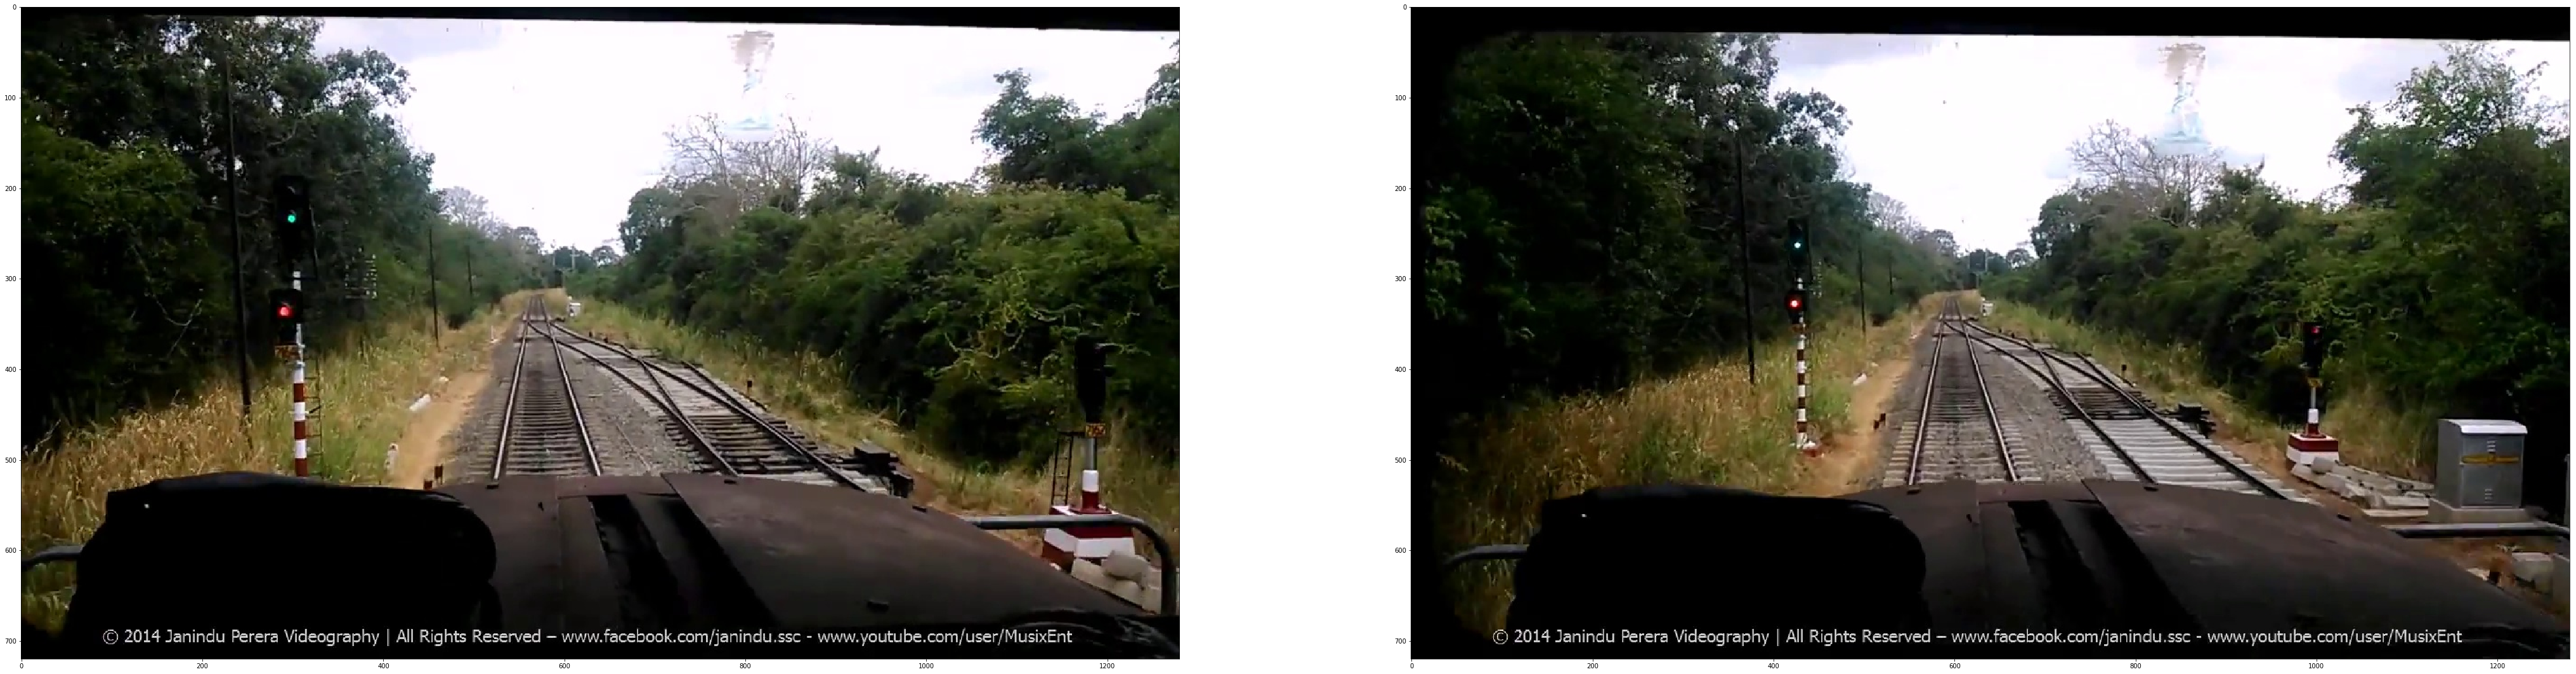

In [3]:
imLights = cv.imread('../images/video-x/frame24.jpg')
imNoLights = cv.imread('../images/video-x/frame23.jpg')

imLights2 = imLights.copy()
imNoLights2 = imNoLights.copy()

plotTwo(imLights, imNoLights)

In [4]:
def drawContours(img):
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cont = cv.drawContours(img, contours, -1, (0,255,0), 3)

In [5]:
def keep_green(img):
    img_hsv=cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([50,50,0])
    upper_red = np.array([255,255,10])
    mask0 = cv.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([50,50,170])
    upper_red = np.array([255,255,180])
    mask1 = cv.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0

    # or your HSV image, which I *believe* is what you want
    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0
    
    return (output_img, output_hsv)

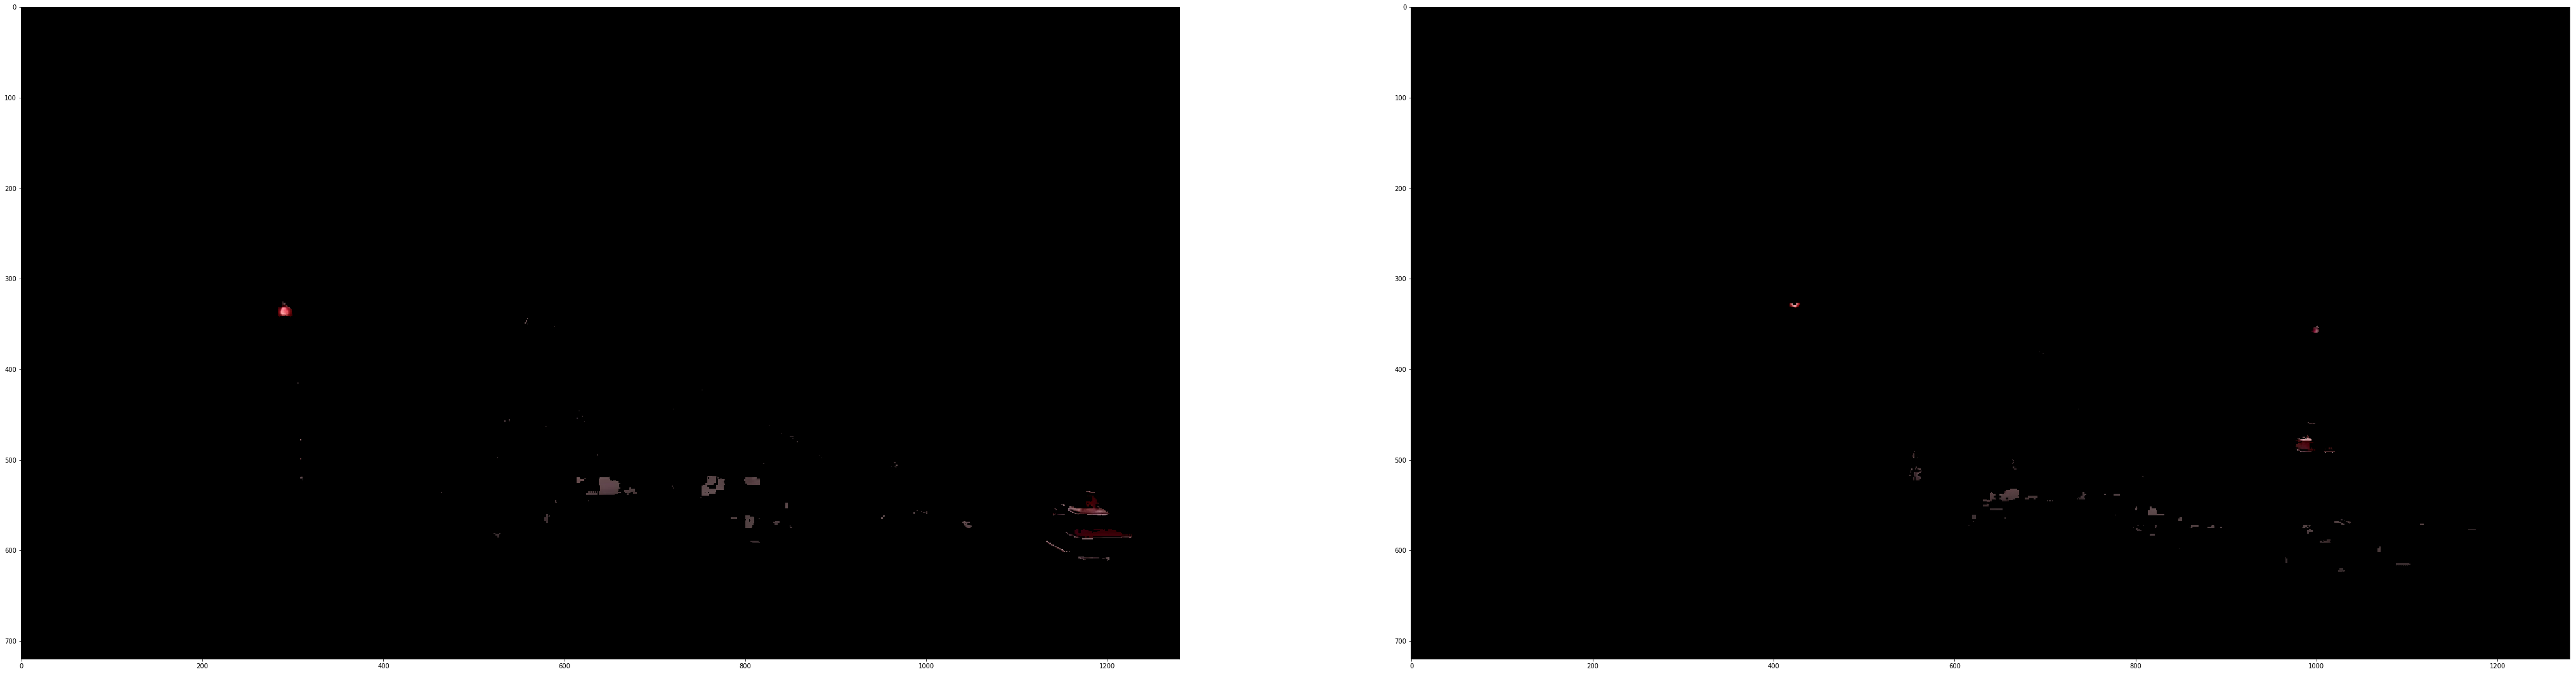

In [6]:
def keep_red(img):
    img_hsv=cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([150,50,50])
    upper_red = np.array([160,255,255])
    mask0 = cv.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0

    # or your HSV image, which I *believe* is what you want
    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0
    
    return (output_img, output_hsv)

output_img, output_hsv = keep_red(imLights)
output_img2, output_hsv2 = keep_red(imNoLights)

plotTwo(output_img, output_img2)

In [7]:
def draw_bright(img, radius):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(gray,(radius, radius), 0)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(gray)
    image = img.copy()
    cv.circle(image, maxLoc, radius, (255,0,0), 2)
    
    return image

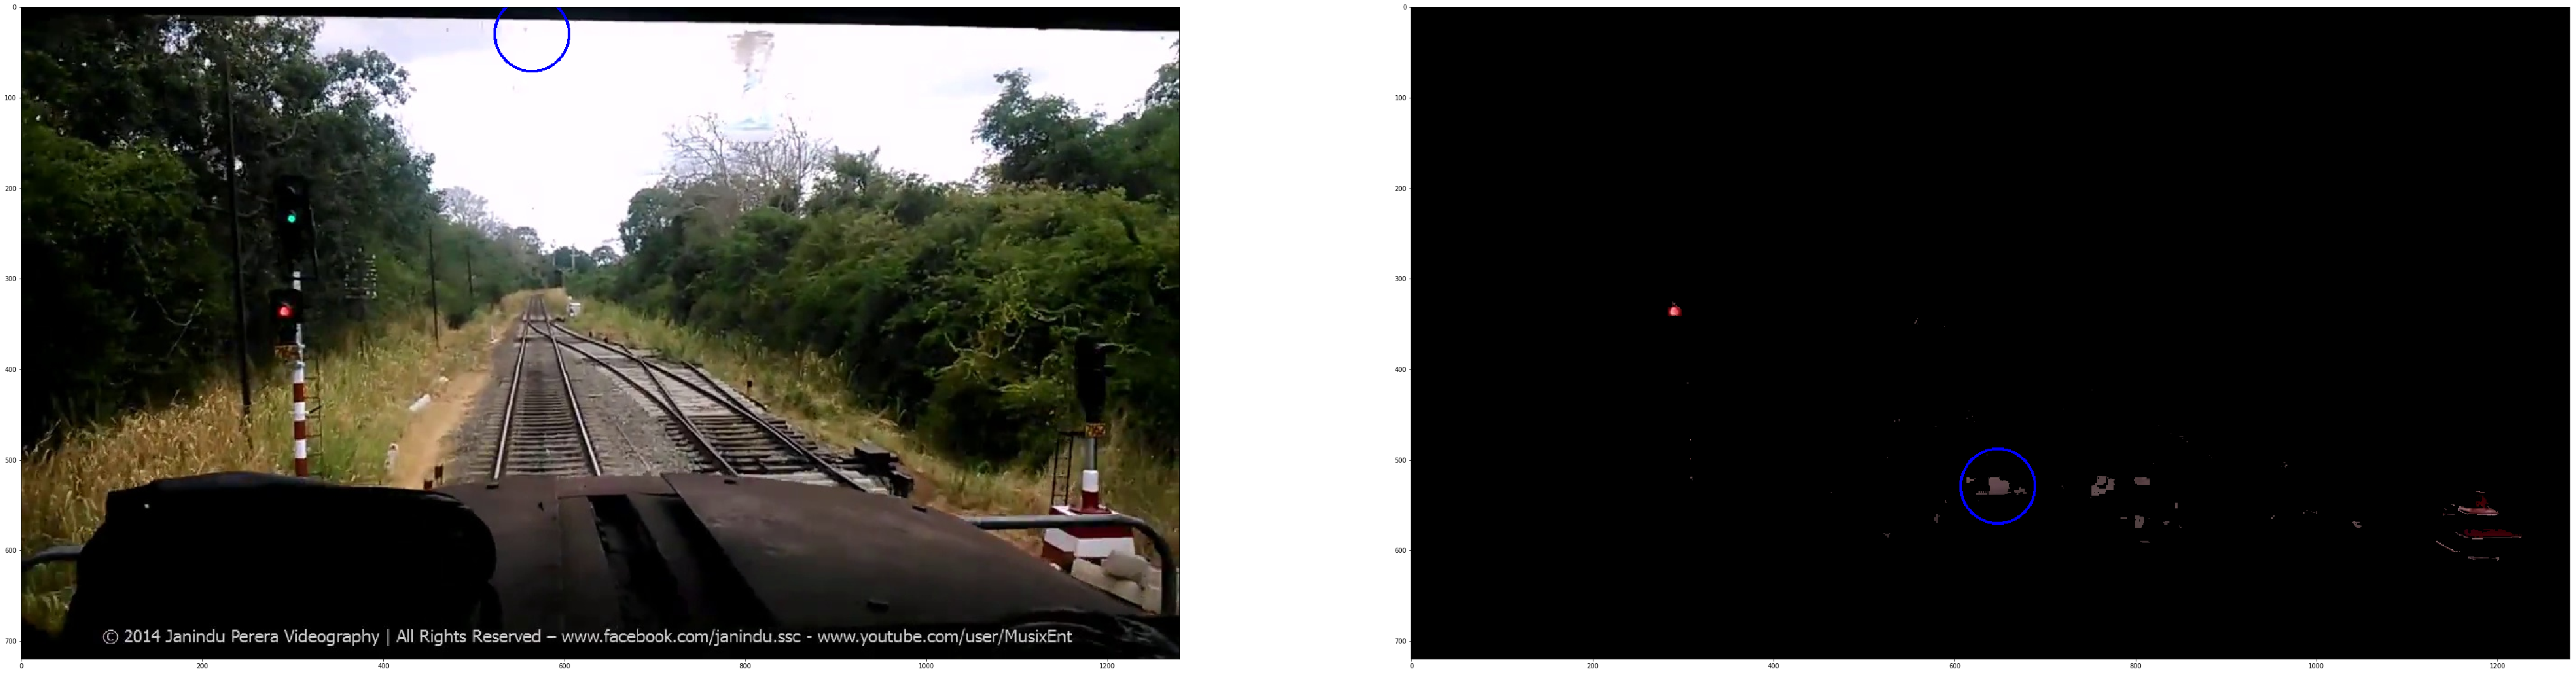

In [8]:
bright_img1 = draw_bright(imLights, 41)
bright_img2 = draw_bright(output_img, 41)
plotTwo(bright_img1, bright_img2)

In [9]:
def draw_large_contour(img):
    lower = np.array([1,0,20], dtype="uint8")
    upper = np.array([60, 40, 200], dtype="uint8")
    
    mask = cv.inRange(img, lower, upper)
    output = cv.bitwise_and(img, img, mask=mask)
    
    ret,thresh = cv.threshold(mask, 40, 255, 0)
    contours,hierachy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    
    if len(contours) != 0:
        cv.drawContours(output, contours, -1, 255, 3)
        
        c = max(contours, key = cv.contourArea)
        
        x,y,w,h = cv.boundingRect(c)
    cv.rectangle(output, (x,y), (x+w, y+h), (0,255,0),2)
    return (output, img)
    

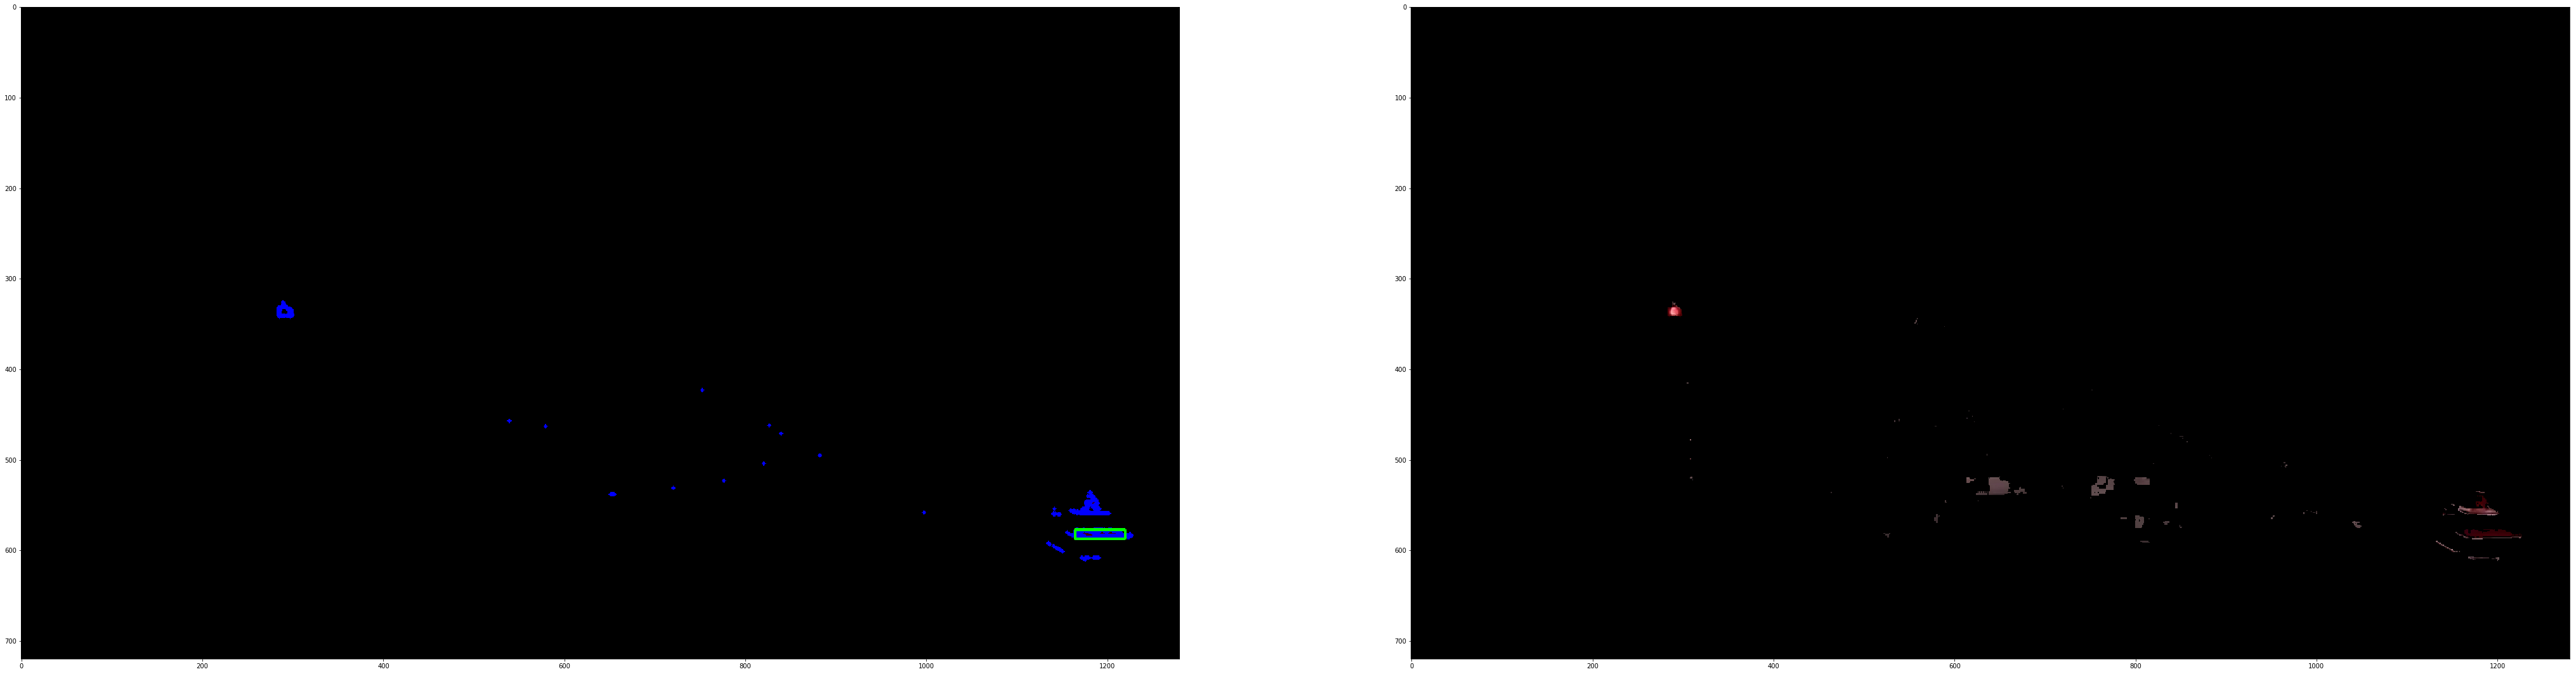

In [10]:
output, img = draw_large_contour(output_img)
plotTwo(output, img)

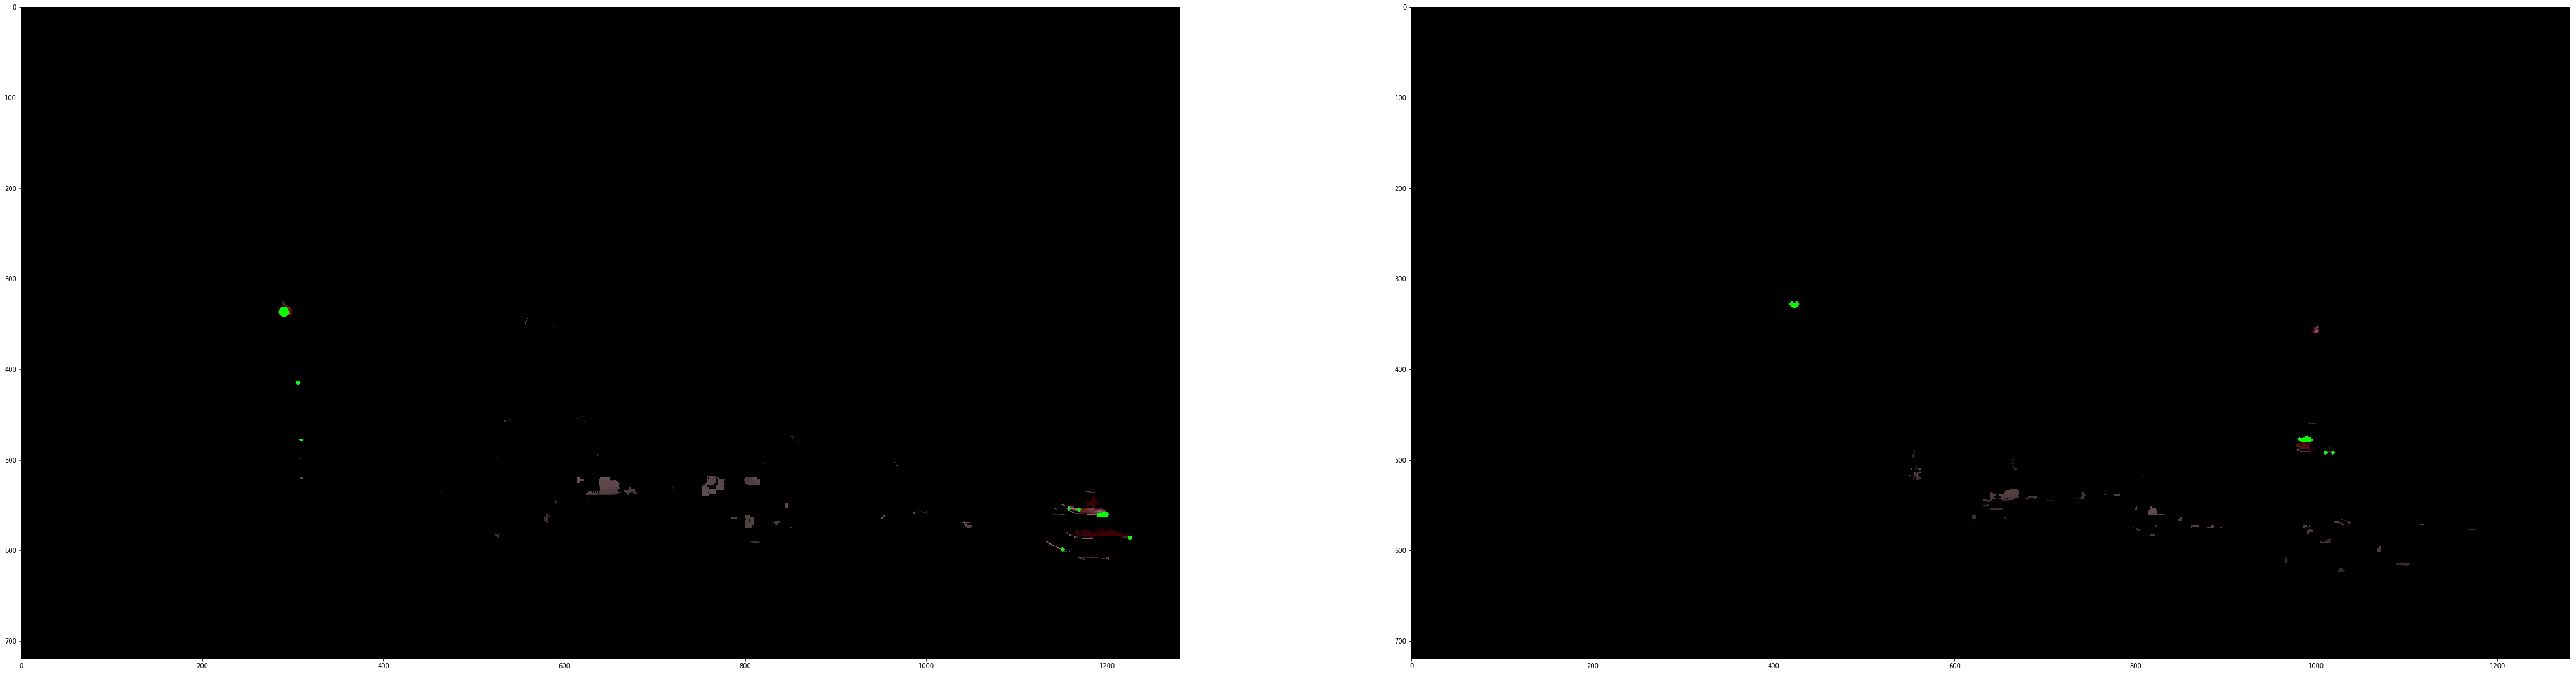

In [11]:
drawContours(output_img)
drawContours(output_img2)

plotTwo(output_img, output_img2)